In [1]:
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
# Use dispersity (between 1 and 3) to choose which system to return a radius from

def pickRadius(dispersity):
    if (dispersity == 1):
        return (1/((np.pi)**0.5))
    if (dispersity == 2):
        a = np.array([((3/(2*(np.pi)))**0.5), ((1/(2*(np.pi)))**0.5)])
        return rnd.choice(a , p = [0.5, 0.5])
    if (dispersity == 3):
        a = np.array([((15/(16*(np.pi)))**0.5), ((5/(4*(np.pi)))**0.5)])
        return rnd.choice(a , p = [0.8, 0.2])

In [3]:
# Class for creating a disc
# Coordinates represent middle of discs
# choose 1-3 for dispersity

class config(): 
    def __init__(self, dispersity):
        self.radius = pickRadius(dispersity)
        self.x = (rnd.rand()) * 20
        self.y = (rnd.rand()) * 20
        return

In [4]:
# iterates attempts of N
#select dispersity scenario of 1-3


def addDiscs(N, dispersity, overlapConstant = 1.0):
    #defines new empty array
    situ = np.array([])
    l = 0
    m = 0
    n = 0
    o = 0
    p = 0
    i = 0 
    coords_redx = []
    coords_redy = []
    coords_bluex = []
    coords_bluey = []
    for i in range(N):
        a = config(dispersity)
        #checks if disc is hitting sides
        insideBox = (
            ((a.x - a.radius > 0) and (a.x + a.radius < 20)) 
            and ((a.y - a.radius > 0) and (a.y + a.radius < 20))
        )
        
        # function to apply across array to check if new disc is hitting any exsisting discs
        def notHitting(a2):
            return (((((a.x - a2.x)**2) + ((a.y - a2.y)**2))**0.5) >
                (overlapConstant * (a.radius + a2.radius)))
        applyAll = np.vectorize(notHitting)
        
        #checking hitting any other disc, accounting for if it's the first disc to be placed
        if (situ.size == 0):
            notHitting = True
        else:
            hittingArray = applyAll(situ)
            notHitting = np.all(hittingArray)
        
        # appends disc to array if it meets conditions
        if (notHitting and insideBox):
            situ = np.append(situ, a)
        
            #mark and sort valid coordinates into colours based off of desired dispersity (judges via radius)
            if a.radius == ((3/(2*(np.pi)))**0.5):
                coords_redx.append(a.x)
                coords_redy.append(a.y)
                l=1
            
            if a.radius ==((1/(2*(np.pi)))**0.5):
                coords_bluex.append(a.x)
                coords_bluey.append(a.y)
                m=1
                
            if a.radius == ((15/(16*(np.pi)))**0.5):
                coords_redx.append(a.x)
                coords_redy.append(a.y)
                n=1
                
            if a.radius == ((5/(4*(np.pi)))**0.5):
                coords_bluex.append(a.x)
                coords_bluey.append(a.y)
                o=1
            
            if a.radius == (1/((np.pi)**0.5)):
                coords_redx.append(a.x)
                coords_redy.append(a.y)
                p=1
                
    #bugs searching (can delete)

    plt.xlim(0,20)
    plt.ylim(0,20)
    
    #
    if l == 1:
        for i in range (len(coords_redx)):
            circle_red = Circle ((coords_redx[i],coords_redy[i]),((3/(2*(np.pi)))**0.5), color = 'red')
            plt.gca().add_patch(circle_red)
            i = i+1
        i=0
    if m == 1:
        for i in range (len(coords_bluex)):
            circle_blue = Circle ((coords_bluex[i],coords_bluey[i]),((1/(2*(np.pi)))**0.5), color = 'blue')
            plt.gca().add_patch(circle_blue)
            i = i+1
        i=0
    if n == 1:
        for i in range (len(coords_redx)):
            circle_red = Circle ((coords_redx[i],coords_redy[i]),((15/(16*(np.pi)))**0.5), color = 'red')
            plt.gca().add_patch(circle_red)
            i = i+1
        i=0
    if o == 1:
        for i in range (len(coords_bluex)):
            circle_blue = Circle ((coords_bluex[i],coords_bluey[i]),((5/(4*(np.pi)))**0.5), color = 'blue')
            i = i+1
            plt.gca().add_patch(circle_blue)
        i=0
    if p == 1:
        for i in range (len(coords_redx)):
            circle_red = Circle ((coords_redx[i],coords_redy[i]),1, color = 'red')
            plt.gca().add_patch(circle_red)
            i = i+1
        i=0 
    plt.show()
    # Returns completed array after end of loop
    return situ

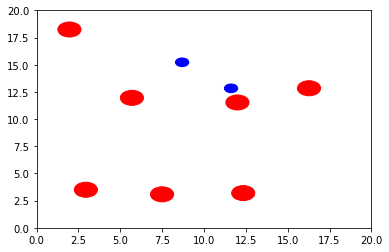

9


In [5]:
testArray = addDiscs(10,2)

print(testArray.size)
print(testArray)

In [6]:
# defines a class for a new random point on the square
class point(): 
    def __init__(self):
        #defines random x and y coordinates between 0 and 20
        self.x = (rnd.rand()) * 20
        self.y = (rnd.rand()) * 20
        return
    # a function that takes an array of discs and determines if the point is within any radius
    def inAnyCircle(self, discArray):
        for i in discArray: 
            inCircle = ((self.x - i.x)**2 + (self.y - i.y)**2)**0.5 < i.radius
            if (inCircle == True):
                return True
        return False
            
def packingFraction(discArray, NSample):
    validCount = 0
    for i in range(NSample):
        singlePoint = point()
        if (singlePoint.inAnyCircle(discArray) == True):
            validCount += 1
    return validCount / NSample
#need to both regenerate the discs and points every time, so below function is invalid

def averagedPackingFraction(NReps, discArray, NSample):
    fractions = np.array([])
    for i in range(NReps):
        fractions = np.append(fractions, (packingFraction(discArray, NSample)))
    return np.mean(fractions)


In [7]:
packingFraction(testArray, 200)

0.04

In [8]:
def combinedFunction(dispersity, overlapConstant, NParticles, NSample, NRep):
    fractions = np.array([])
    for i in range(NRep):
        discArray = addDiscs(NParticles, dispersity, overlapConstant)
        fractions = np.append(fractions, (packingFraction(discArray, NSample)))
    return np.mean(fractions)    
    

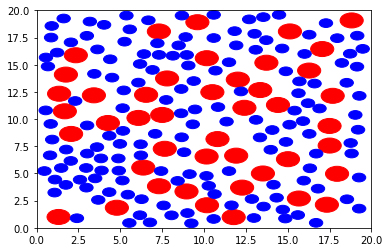

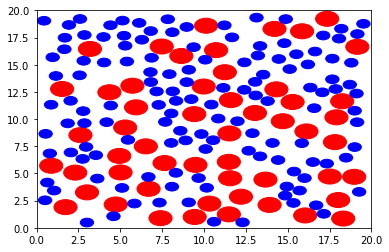

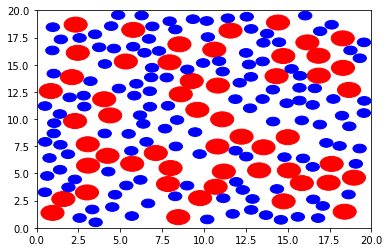

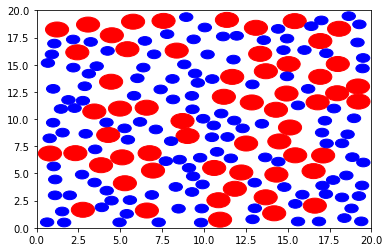

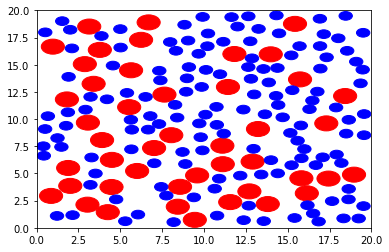

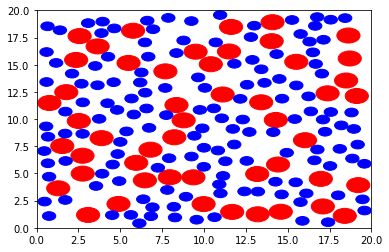

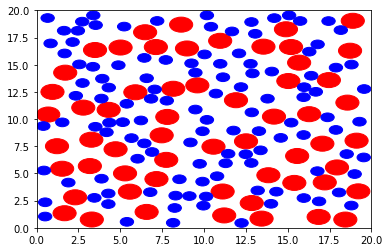

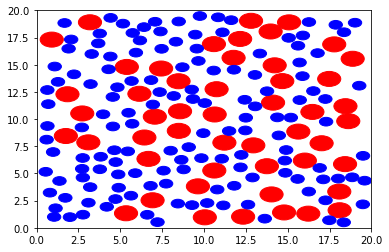

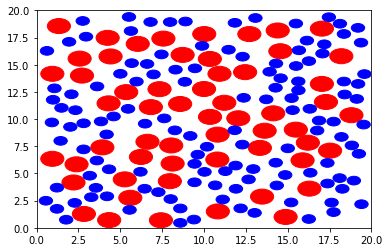

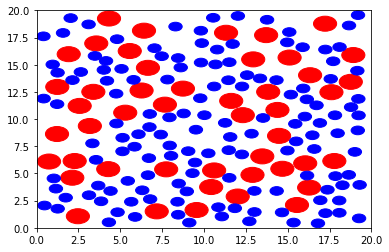

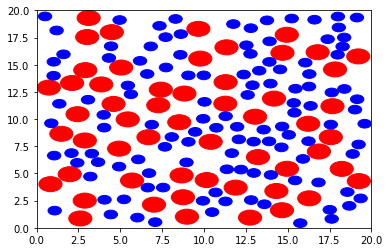

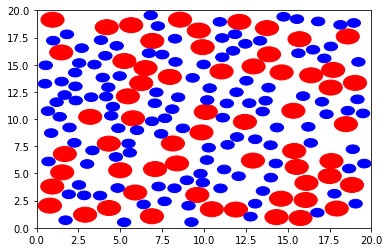

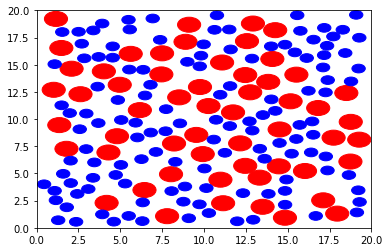

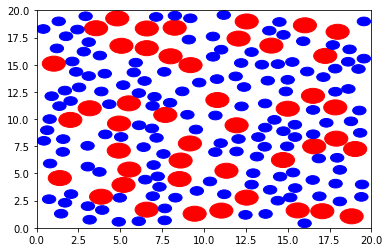

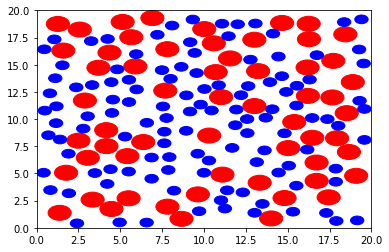

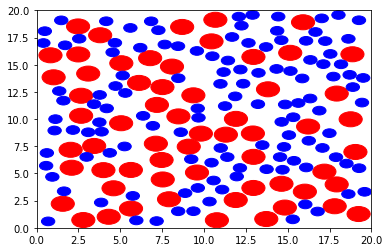

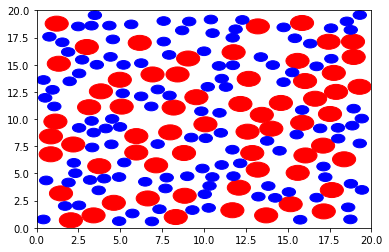

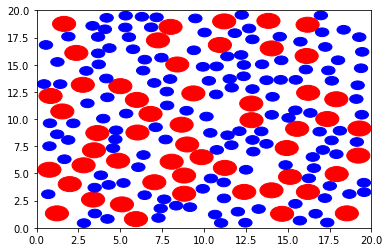

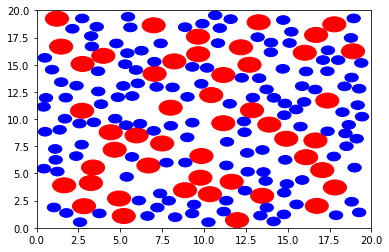

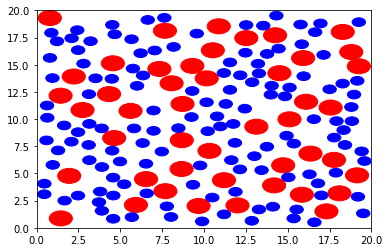

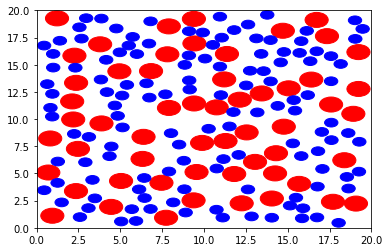

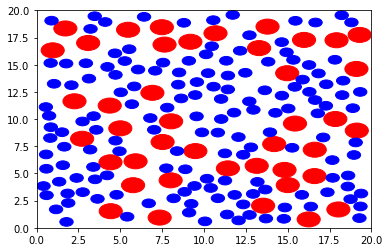

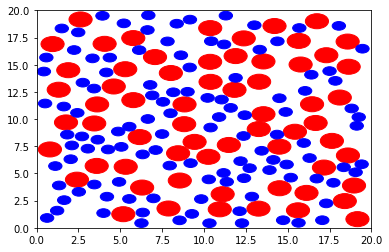

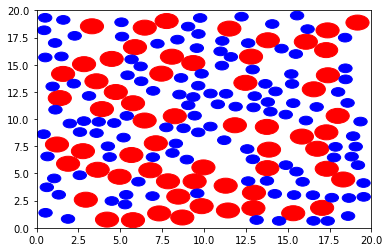

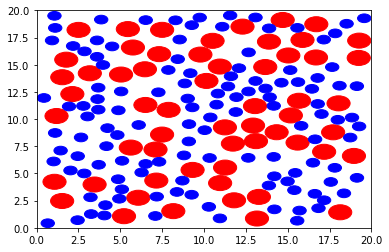

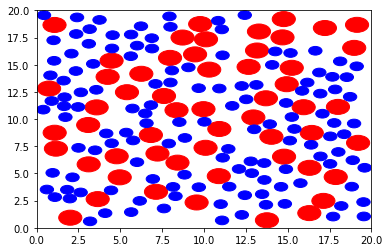

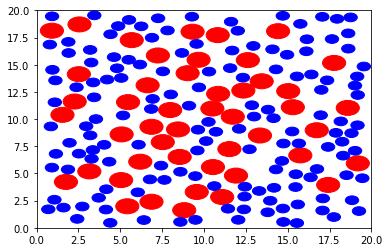

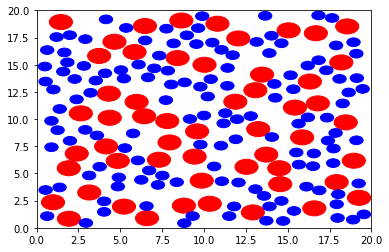

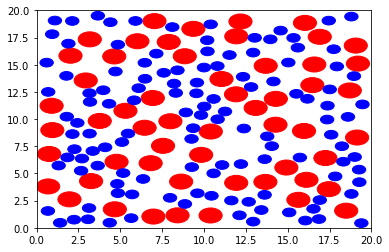

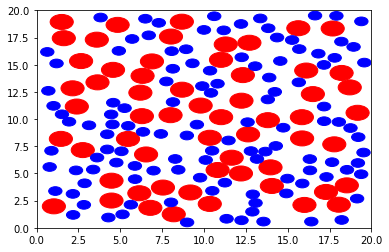

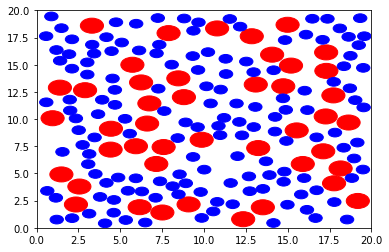

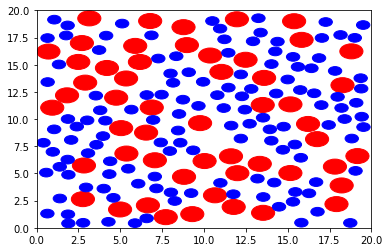

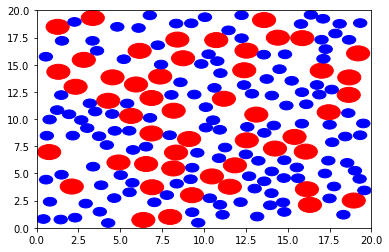

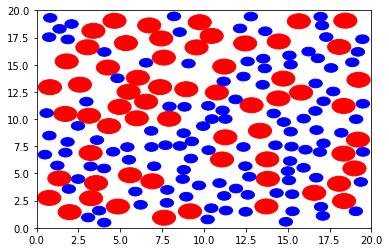

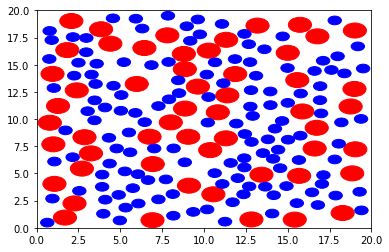

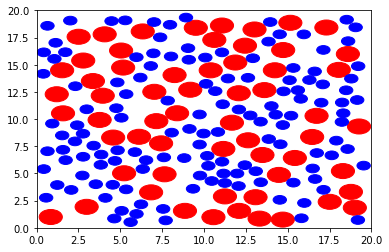

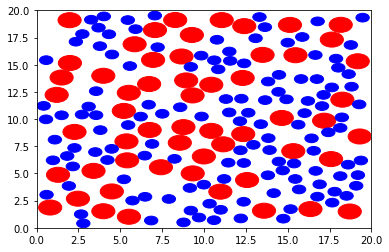

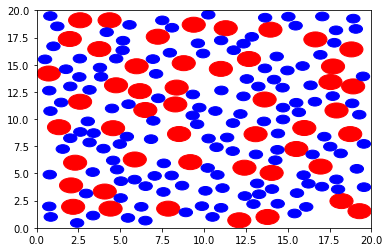

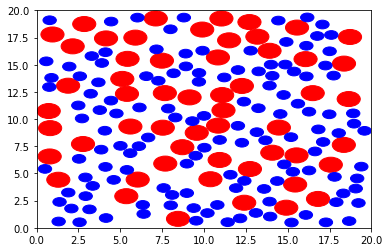

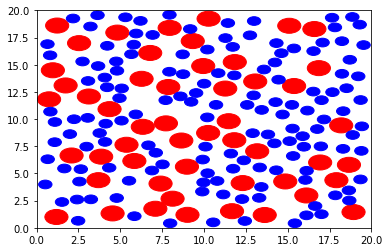

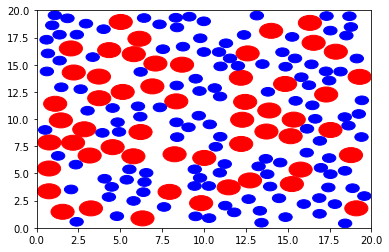

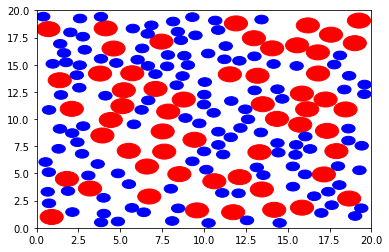

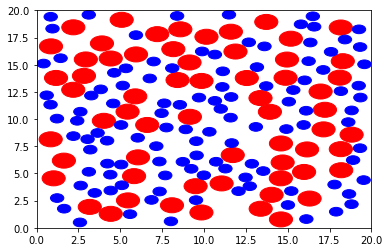

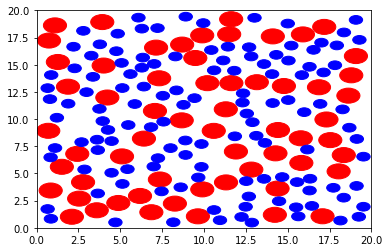

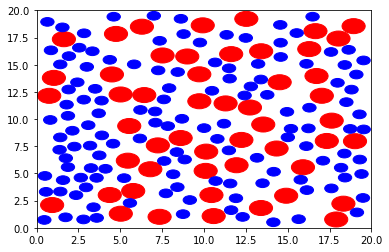

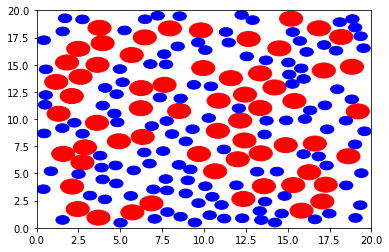

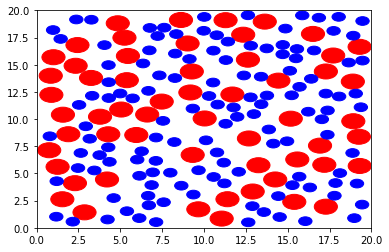

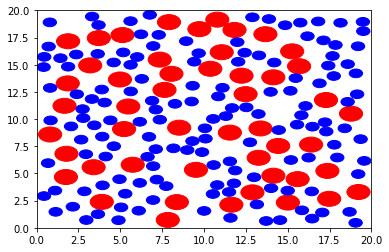

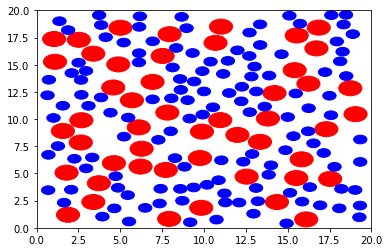

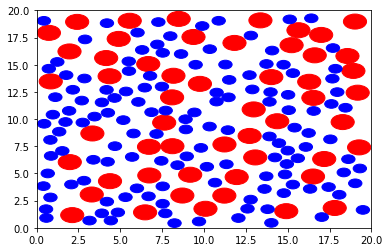

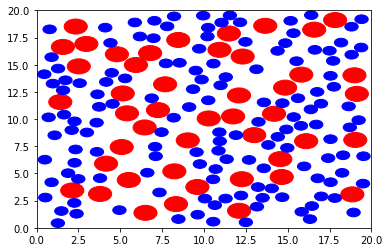

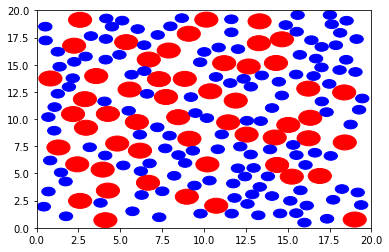

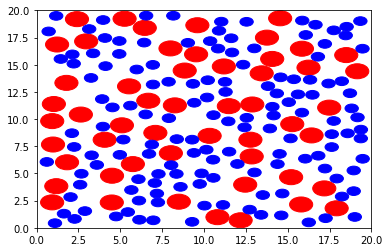

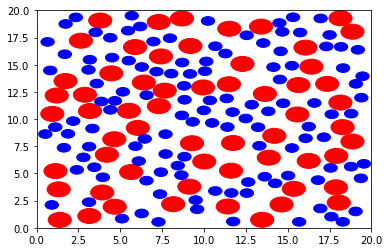

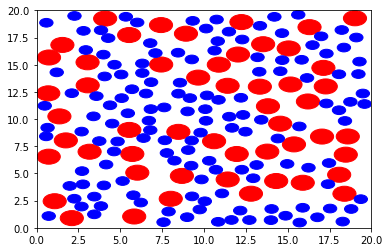

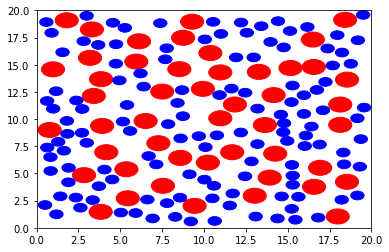

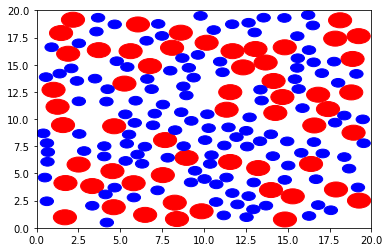

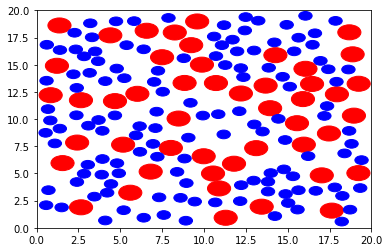

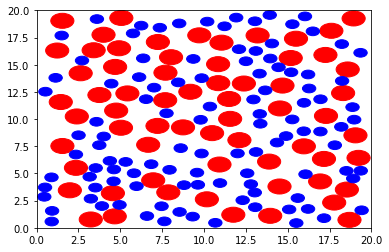

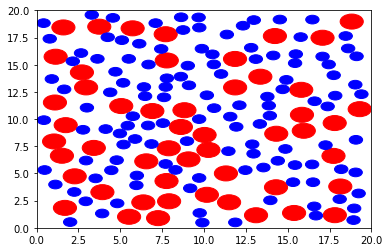

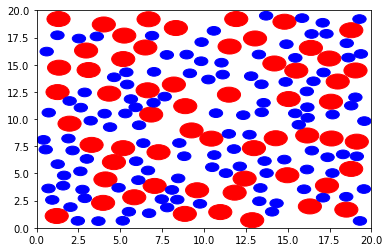

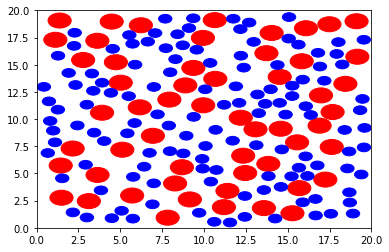

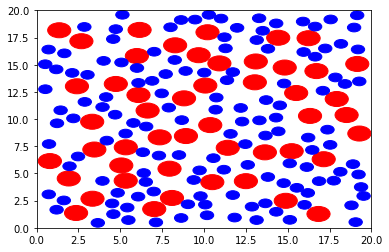

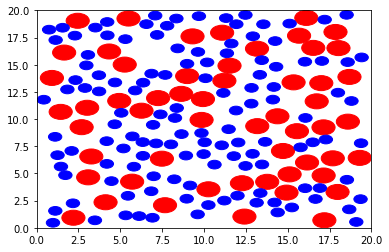

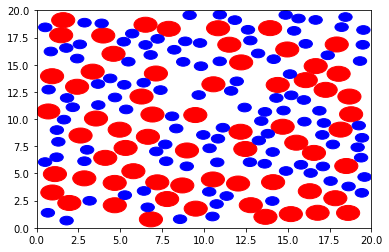

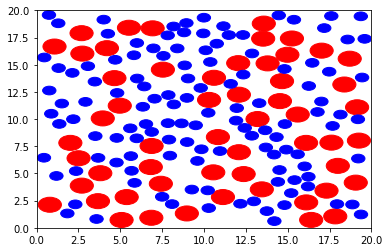

In [ ]:
print (combinedFunction(2, 1, 1000, 1000, 100))